# SOFTMAX 回归模型

## SOFTMAX回归模型引出
softmax回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，softmax回归的输出值个数等于标签里的类别数。因为一共有4种特征和3种输出动物类别，所以权重包含12个标量（带下标的 $w$）、偏差包含3个标量（带下标的 $b$），且对每个输入计算 $o_1, o_2, o_3$ 这3个输出：

$$
\begin{cases}
o_1 = x_1 w_{11} + x_2 w_{21} + x_3 w_{31} + x_4 w_{41} + b_1, \\
o_2 = x_1 w_{12} + x_2 w_{22} + x_3 w_{32} + x_4 w_{42} + b_2, \\
o_3 = x_1 w_{13} + x_2 w_{23} + x_3 w_{33} + x_4 w_{43} + b_3.
\end{cases}
$$

下图用神经网络图描绘了上面的计算。softmax回归同线性回归一样，也是一个单层神经网络。由于每个输出 $o_1, o_2, o_3$ 的计算都要依赖于所有的输入 $x_1, x_2, x_3, x_4$，softmax回归的输出层也是一个全连接层。

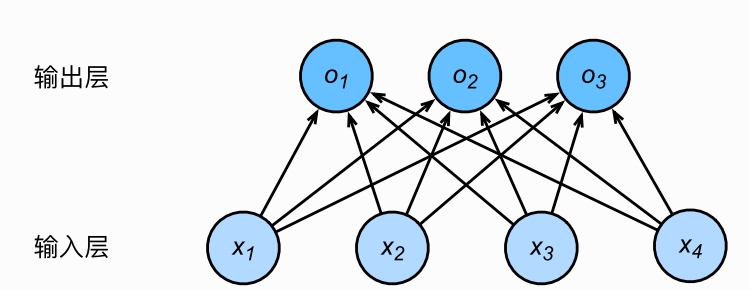

既然分类问题需要得到离散的预测结果，一个简单的办法是将输出值 $o_i$ 当作预测类别是 $i$ 的置信度，并将值最大的输出所对应的类作为预测输出，即输出 $\arg \max_i o_i$。例如，如果 $o_1, o_2, o_3$ 分别为0.1，10，0.1，由于 $o_2$ 最大，那么预测类别为2。

然而直接使用输出层的输出有两个问题。
1. 由于输出层的输出范围不确定，我们难以直观判断这些值的意义。例如，10表示很置信图像类别为2，因为该输出值是其他类的输出值的100倍。但如果 $o_1 = o_3 = 10^3$，那么输出值10却又表示图像类别为2的概率很低。
2. 由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。

Softmax运算符解决了以上两个问题。它通过下式将输出值变成值为正且和为1的概率分布。

我们通过 softmax 函数将线性叠加的输出转换为概率分布：  

$$
\hat{y}_1, \hat{y}_2, \hat{y}_3 = \text{softmax}(o_1, o_2, o_3)
$$  

其中  

$$
\hat{y}_1 = \frac{\exp(o_1)}{\sum_{i=1}^3 \exp(o_i)}, \quad 
\hat{y}_2 = \frac{\exp(o_2)}{\sum_{i=1}^3 \exp(o_i)}, \quad 
\hat{y}_3 = \frac{\exp(o_3)}{\sum_{i=1}^3 \exp(o_i)}.
$$  


容易看出 $\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$ 且 $0 \leq \hat{y}_1, \hat{y}_2, \hat{y}_3 \leq 1$，因此 $\hat{y}_1, \hat{y}_2, \hat{y}_3$ 是一个合法的概率分布。这时候，如果 $\hat{y}_2 = 0.8$，不管 $\hat{y}_1$ 和 $\hat{y}_3$ 的值是多少，我们都知道图像类别为猫的概率是 80%。此外，我们注意到  

$$
\arg\max_i o_i = \arg\max_i \hat{y}_i
$$  

因此 softmax 运算不改变预测类别输出。  

## 单样本分类的矢量计算表达式

为了提高效率，我们将但样本分类通过矢量计算来表示。在上面的图像分类问题中，假设softmax回归的权重和偏差参数分别为：

我们先定义权重矩阵和偏置向量：  

$$
\boldsymbol{W} = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43}
\end{bmatrix}, \quad 
\boldsymbol{b} = \begin{bmatrix} b_1 & b_2 & b_3 \end{bmatrix},
$$  

设高和宽分别为 2 个像素的图像样本 $i$ 的特征为  

$$
\boldsymbol{x}^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)} \end{bmatrix},
$$  

输出层的输出为  

$$
\boldsymbol{o}^{(i)} = \begin{bmatrix} o_1^{(i)} & o_2^{(i)} & o_3^{(i)} \end{bmatrix},
$$  

预测为狗、猫或鸡的概率分布为  

$$
\hat{\boldsymbol{y}}^{(i)} = \begin{bmatrix} \hat{y}_1^{(i)} & \hat{y}_2^{(i)} & \hat{y}_3^{(i)} \end{bmatrix}.
$$  

softmax 回归对样本 $i$ 分类的矢量计算表达式为  

$$
\begin{cases}
\boldsymbol{o}^{(i)} = \boldsymbol{x}^{(i)} \boldsymbol{W} + \boldsymbol{b}, \\
\hat{\boldsymbol{y}}^{(i)} = \text{softmax}(\boldsymbol{o}^{(i)}).
\end{cases}
$$

## 小批量样本分类的矢量计算表达式

为了进一步提升计算效率，我们通常对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为 $n$，输入个数（特征数）为 $d$，输出个数（类别数）为 $q$。设批量特征为 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$。假设 softmax 回归的权重和偏差参数分别为 $\boldsymbol{W} \in \mathbb{R}^{d \times q}$ 和 $\boldsymbol{b} \in \mathbb{R}^{1 \times q}$。softmax 回归的矢量计算表达式为  

$$
\begin{cases}
\boldsymbol{O} = \boldsymbol{X}\boldsymbol{W} + \boldsymbol{b}, \\
\hat{\boldsymbol{Y}} = \text{softmax}(\boldsymbol{O}),
\end{cases}
$$  

其中的加法运算使用了广播机制，$\boldsymbol{O}, \hat{\boldsymbol{Y}} \in \mathbb{R}^{n \times q}$ 且这两个矩阵的第 $i$ 行分别为样本 $i$ 的输出 $\boldsymbol{o}^{(i)}$ 和概率分布 $\hat{\boldsymbol{y}}^{(i)}$。  

## 交叉熵损失函数

我们可以像线性回归那样使用平方损失函数 $\|\hat{\boldsymbol{y}}^{(i)} - \boldsymbol{y}^{(i)}\|^2 / 2$。然而，想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果 $y^{(i)} = 3$，那么我们只需要 $\hat{y}_3^{(i)}$ 比其他两个预测值 $\hat{y}_1^{(i)}$ 和 $\hat{y}_2^{(i)}$ 大就行了。即使 $\hat{y}_3^{(i)}$ 值为 0.6，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如 $\hat{y}_1^{(i)} = \hat{y}_2^{(i)} = 0.2$ 比 $\hat{y}_1^{(i)} = 0, \hat{y}_2^{(i)} = 0.4$ 的损失要小很多，虽然两者都有同样正确的分类预测结果。  

改善上述问题的一个方法是使用更适合衡量两个概率分布差异的测量函数。其中，**交叉熵（cross entropy）** 是一个常用的衡量方法：  

$$
H\left(\boldsymbol{y}^{(i)}, \hat{\boldsymbol{y}}^{(i)}\right) = -\sum_{j=1}^q y_j^{(i)} \log \hat{y}_j^{(i)},
$$

其中带下标的 $y_j^{(i)}$ 是向量 $\boldsymbol{y}^{(i)}$ 中非0即1的元素，需要注意将它与样本 $i$ 类别的离散数值（即不带下标的 $y^{(i)}$）区分。在上式中，我们知道向量 $\boldsymbol{y}^{(i)}$ 中只有第 $y^{(i)}$ 个元素 $y_{y^{(i)}}^{(i)}$ 为1，其余全为0，于是  

$$
H\left( \boldsymbol{y}^{(i)}, \hat{\boldsymbol{y}}^{(i)} \right) = -\log \hat{y}_{y^{(i)}}^{(i)}
$$

也就是说，交叉熵只关心对**正确类别**的预测概率，因为只要其值足够大，就可以确保分类结果正确。当然，遇到一个样本有多个标签时（例如图像里含有不止一个物体时），我们并不能做这一步简化。但即便对于这种情况，交叉熵同样只关心对图像中出现的物体类别的预测概率。  

假设训练数据集的样本数为 $n$，交叉熵损失函数定义为：  

$$
\ell(\boldsymbol{\Theta}) = \frac{1}{n} \sum_{i=1}^n H\left( \boldsymbol{y}^{(i)}, \hat{\boldsymbol{y}}^{(i)} \right)
$$

其中 $\boldsymbol{\Theta}$ 代表模型参数。同样地，如果每个样本只有一个标签，那么交叉熵损失可以简写成 $\ell(\boldsymbol{\Theta}) = -\frac{1}{n} \sum_{i=1}^n \log \hat{y}_{y^{(i)}}^{(i)}$ 从另一个角度来看，我们知道最小化 $\ell(\boldsymbol{\Theta})$ 等价于最大化 $\exp\left(-n\ell(\boldsymbol{\Theta})\right) = \prod_{i=1}^n \hat{y}_{y^{(i)}}^{(i)}$ 即最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的 **联合预测概率**。

## 模型预测及评价

在训练好分类模型后，给定任一样本，就可以预测每个输出的概率。通常，我们把预测概率最大的类别作为输出类别。如果它与帧数类别一致，那么这次预测是正确的。我们将使用准确率来评价模型的表现。它等于正确预测数量与总预测数量的比

# 图像分类数据集

在介绍softmax回归的实现之前我们先引入一个多类图像分类数据集。它将在后面的章节中被多次使用，以方便我们观察比较算法之间在模型精度和计算效率上的区别。图像分类数据集中最常见的是手写数字的书别数据集 MNIST。但大部分模型在MNIST上的分类精度都超过了 95%。为了更直观地关擦算法之间的差异，我们将使用一个图像内容更加复杂的数据集 Fashion——MNIST。

本节将使用 `torchvision`包，由以下部分构成

1. `torchvision.datasets` : ⼀些加载数据的函数及常⽤的数据集接⼝；
2. `torchvision.models` : 包含常⽤的模型结构（含预训练模型），例如AlexNet、VGG、
ResNet等；
3. `torchvision.transforms` : 常⽤的图⽚变换，例如裁剪、旋转等；
4. `torchvision.utils` : 其他的⼀些有⽤的⽅法。

In [2]:
# 获取数据集
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys


下面，通过`torchvision`的`torchvision.datasets`来下载这个数据集。第一次调用会自动从网上后去数据。我们通过参数`train`来制定获取收据寄后测试数据(testing data set)。测试数据集也叫测试(testing set)。只能用来评价模型的表现，并不用来训练模型。

另外还有参数`transform = transforms.ToTensor()` 将所有数据转换为 `tensor`。如果不进行转换则返回的是图片。

`transforms.ToTensor()` 将尺寸为（H x W x C）且数据位于数据位于[0, 255]的PIL 图⽚或者数据类型为 `np.uint8` 的 `NumPy` 数组转换为尺⼨为 (C x H x W) 且数据类型为 `torch.float32` 且位于[0.0, 1.0]的 `Tensor` 。

由于像素值为0到255的整数，所以刚好是uint8所能表达的范围。包括 `transforms.ToTensor()`在内的一些关于图片的函数就默认输入的是 uint8 型。如果⽤像素值(0-255整数)表示图⽚数据，那么⼀律将其类型设置成uint8，避免不必要的bug

In [3]:
mnist_train =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())

100.0%


Extracting /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw



100.6%


Extracting /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw



100.0%


Extracting /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw



119.3%

Extracting /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/zhoujinyu/Datasets/FashionMNIST/FashionMNIST/raw



In [5]:
print(type(mnist_train))
print(len(mnist_train),len(mnist_test))

torchvision.datasets.mnist.FashionMNIST
60000 10000


In [25]:
feature,label = mnist_train[0]
print(feature.shape,label)

torch.Size([1, 28, 28]) 9


变量`feature`对应高与宽均为28像素的图像。由于我们使用了`transform.ToTensor()`，所以每个像素点数值为（0.0，1）的32位浮点数。需要注意的是，`feature`的尺寸为 (C x H x W) 的，⽽不是 (H x W x C)。第⼀维是通道数，因为数据集中是灰度图像，所以通道数为1。后⾯两维分别是图像的⾼和宽。

In [7]:
def get_fashion_mnist_labels(labels):
    text_labels =['t-shirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [31]:
def show_fashion_mnist(images, labels):
 # 这⾥的_表示我们忽略（不使⽤）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12)) # 设置图像大小 _表示整个图像的数据，由于不需要操作故用_ 表示，只接受不操作。
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy()) #省去颜色通道的维度，转化成28*28。plt.imshow() 需要numpy的数据。故转化成numpy()
        f.set_title(lbl) #标题
        f.axes.get_xaxis().set_visible(False) #获取坐标信息并隐藏
        f.axes.get_yaxis().set_visible(False)
    plt.show()

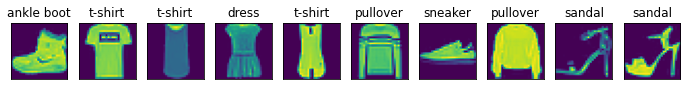

In [32]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))
# mnist_train[i] 有两个数据。一个是图像的信息，一个是图像的标签。
# 图像的信息是1*28*28 表示1个颜色通道，28长28宽的图

In [34]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)

In [35]:
start = time.time()
for X,y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

1.92 sec


## SOFTMAX回归的从零开始实现

In [37]:
import torch
import torchvision
import numpy as np
import sys 

In [38]:
num_inputs = 784
num_outputs = 10
W = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_outputs)),dtype=torch.float)
b = torch.zeros(num_outputs,dtype=torch.float)

在介绍如何定义softmax回归之前，我们先描述一下对如何对多维`Tensor`按维度操作。

下面例子展示了按同一列或同一行的元素求和

In [41]:
X = torch.tensor([[1,2,3],[4,5,6]])
print(X.sum(dim=0,keepdim=True))
print(X.sum(dim=1,keepdim=True))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


In [ ]:
# 定义softmax
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1,keepdim=True)
    return X_exp/partition

In [ ]:
# 检验一下 
X = torch.rand((2,5))
X_prob = softmax(X)
print(X_prob,X_prob.sum(dim=1))

tensor([[0.1170, 0.2772, 0.2670, 0.1367, 0.2021],
        [0.2699, 0.1570, 0.2676, 0.1993, 0.1062]]) tensor([1., 1.])


In [104]:
# 定义函数
def net(X):
    # 先将X重塑为 (-1, num_inputs) 形状，再与权重矩阵W做乘法，最后加偏置b
    return softmax(torch.mm(X.view(-1, num_inputs), W) + b)


上文介绍了softmax回归使用的交叉熵损失函数。为了得到标签的预测概率，我们可以使用`gather`函数。在下面的例子中，变量`y_hat`是2个样本在三个类别的预测概率，变量`y` 是这2个样本的标签类别。通过`gather`函数，我们得到2个样本的标签的预测概率。

In [87]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.tensor([0,2])
# y.view(-1,1) = tensor([[0],[2]])
y_hat.gather(1,y.view(-1,1)) #1表示第一维度上进行操作。0维度表示行，1表示列。
#第一行 y的标签为0，即索引为0，对应的y_hat = 0.1...


tensor([[0.1000],
        [0.5000]])

In [88]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat.gather(1,y.view(-1,1)))

In [89]:
# 准确度
def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()
# argmax(dim=1) 在每行中的最大的数对应的索引

In [90]:
print(accuracy(y_hat,y))

0.5


In [105]:
def evalua_accuracy(data_iter,net):
    acc_sum,n = 0.0,0
    for X,y in data_iter:
        acc_sum += (net1(X).argmax(dim=1)==y).float().sum().item() #item() 可以提取出这个元素的值，得到一个纯 Python 类型的数值，而不是张量对象。
        n+=y.shape[0]
    return acc_sum/n

In [106]:
print(evalua_accuracy(test_iter,net))

0.0726


## 代码整理

**小批量训练集和测试集**
```python
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)
```

**参数设置**
```python
num_inputs = 784
num_outputs = 10
W = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_outputs)),dtype=torch.float)
b = torch.zeros(num_outputs,dtype=torch.float)
```

**损失函数**
```python
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1,keepdim=True)
    return X_exp/partition
```

**定义函数**
```python
def net(X):
    # 先将X重塑为 (-1, num_inputs) 形状，再与权重矩阵W做乘法，最后加偏置b
    return softmax(torch.mm(X.view(-1, num_inputs), W) + b)
```

**交叉熵**
```python
def cross_entropy(y_hat,y):
    return -torch.log(y_hat.gather(1,y.view(-1,1)))
```

**准确度**
```python
def evalua_accuracy(data_iter,net):
    acc_sum,n = 0.0,0
    for X,y in data_iter:
        acc_sum += (net(X).argmax(dim=1)==y).float().sum().item() #item() 可以提取出这个元素的值，得到一个纯 Python 类型的数值，而不是张量对象。
        n+=y.shape[0]
    return acc_sum/n
```

In [125]:
import torch.optim as optim
num_epochs,lr = 5,0.1
W.requires_grad=True
b.requires_grad=True
def train_ch3(net,train_iter,test_iter,loss,num_epoches,batch_size,params = None,lr = None,optimizer =None):
    for epoch in range(num_epoches):
        train_l_sum,train_acc_sum,n = 0.0,0.0,0
        for X,y in train_iter:
            y_hat = net(X)
            l = loss(y_hat,y).sum()
            optimizer.step()

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1)==y).sum().item()
            n+= y.shape[0]
        test_acc = evalua_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_l_sum / n, train_acc_sum / n,test_acc))


In [126]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs,
batch_size, [W, b], lr)

AttributeError: 'NoneType' object has no attribute 'step'

In [ ]:
num_epochs, lr = 5, 0.1

def sgd(params, lr, batch_size):
    for param in params:
        # 参数更新公式：param = param - lr * (梯度 / batch_size)
        param.data -= lr * param.grad / batch_size  # in-place更新参数
        # 清零梯度，避免下一次反向传播时累积
        param.grad.data.zero_()

def train_ch3(net, train_iter, test_iter, loss, num_epochs,
batch_size,
    params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0

        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
 # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
 # 梯度优化
            l.backward()
            if optimizer is None:
                for param in params:
                    param.data -= lr * param.grad / batch_size  
                    param.grad.data.zero_()
            else:
                optimizer.step() 
 
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) ==y).sum().item()
            n += y.shape[0]
        test_acc = evalua_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_l_sum / n, train_acc_sum / n,test_acc))

In [136]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs,
batch_size, [W, b], lr)

epoch 1, loss 0.4739, train acc 0.840, test acc 0.829
epoch 2, loss 0.4648, train acc 0.843, test acc 0.826
epoch 3, loss 0.4582, train acc 0.845, test acc 0.831
epoch 4, loss 0.4525, train acc 0.846, test acc 0.834
epoch 5, loss 0.4474, train acc 0.848, test acc 0.825
